An Exploration of Factors Affecting Overall Scores in FIFA 19

Carnell Zhou cz375

Introduction

The 26th instalment of the FIFA series, FIFA 19, is a competitive football simulation video game. The game features a large selection of players from real life, each with factual specifications such as their club, age, preferred foot, wage and nationality as well as appointed numerical scores that estimate their ability in a host of categories including dribbling, ball control, composure, and accuracy. Inside the game, the user can assume control of the different in-game players by passing the ball between them. In addition, the user can control an individual player’s motion, shot-timing (to produce more accurate shots), and dribbling moves to get around defenders.

The dataset that I chose was a representation of FIFA 19's Player Attributes. The data set details 18206 unique players each with the attributes: Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause. I will be especially focusing on the attributes with high correlations with the overall score.

Link to dataset: https://www.kaggle.com/karangadiya/fifa19

Problem and Hypothesis

The primary problem we'll be exploring is "Will a certain selection of attributes be a better predictor of their overall score?" We will also take a look at additional questions such as "Will a player's overall rating surpass the average overall score?"

We'll be comparing the effects of certain attributes on a player's overall score. Our hypothesis is that a player's technical abilities rather than nontechnical skills will be a more accurate predictor of their overall rating.

Cleaning the Dataset

The first step is importing numpy, pandas, and the dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
fifa = pd.read_csv('data.csv')

Firstly, let's clean up the data as there are many empty cells in the needed columns, which we've decided to slim down to the following attributes: Dribbling, LongShots, Finishing, Reactions, Vision, Composure, and Penalties. Let's impute them with the means of their respective columns:

In [3]:
fifa['Dribbling'] = fifa['Dribbling'].fillna(fifa['Dribbling'].mean())
fifa['LongShots'] = fifa['LongShots'].fillna(fifa['LongShots'].mean())
fifa['Finishing'] = fifa['Finishing'].fillna(fifa['Finishing'].mean())
fifa['Reactions'] = fifa['Reactions'].fillna(fifa['Reactions'].mean())
fifa['Vision'] = fifa['Vision'].fillna(fifa['Vision'].mean())
fifa['Composure'] = fifa['Composure'].fillna(fifa['Composure'].mean())
fifa['Penalties'] = fifa['Penalties'].fillna(fifa['Penalties'].mean())

Visualizations

Let's construct a correlation matrix to observe the correlations of these variables.

           Dribbling  LongShots  Finishing  Reactions    Vision  Composure  \
Dribbling   1.000000   0.843619   0.824337   0.369265  0.730150   0.597498   
LongShots   0.843619   1.000000   0.877834   0.421649  0.753701   0.616102   
Finishing   0.824337   0.877834   1.000000   0.331376  0.697290   0.533414   
Reactions   0.369265   0.421649   0.331376   1.000000  0.502536   0.685558   
Vision      0.730150   0.753701   0.697290   0.502536  1.000000   0.636280   
Composure   0.597498   0.616102   0.533414   0.685558  0.636280   1.000000   
Penalties   0.769594   0.812446   0.837827   0.346143  0.632927   0.551801   
Overall     0.372241   0.420586   0.332349   0.849622  0.498646   0.727293   

           Penalties   Overall  
Dribbling   0.769594  0.372241  
LongShots   0.812446  0.420586  
Finishing   0.837827  0.332349  
Reactions   0.346143  0.849622  
Vision      0.632927  0.498646  
Composure   0.551801  0.727293  
Penalties   1.000000  0.341259  
Overall     0.341259  1.000000  


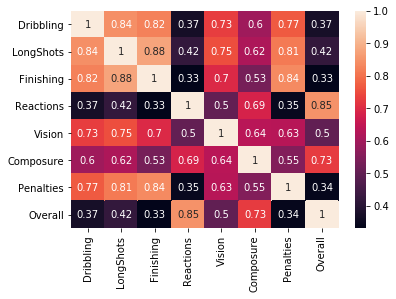

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

fifa1 = fifa[['Dribbling','LongShots','Finishing','Reactions','Vision','Composure','Penalties', 'Overall']]
corrMatrix = fifa1.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()


From our correlation matrix, we observe that the two best attributes to use in predicting a player's overall score are Composure and Reactions. Let's take a closer look at these two attributes and train them.

In [22]:
two_correlated_features = fifa1[['Composure', 'Reactions']]
target = fifa1['Overall']

#for two_correlated_features:
x_train, x_test, y_train, y_test = train_test_split(two_correlated_features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
print('Model score', model.score(x_test, y_test))


Model score 0.7581765102665732


Now, let's perform a linear regression comparing these two attributes.

In [6]:
overall_model = LinearRegression()
X_C = fifa1[["Composure"]]
Y_C = fifa1["Reactions"]
x_tr_C, x_te_C, y_tr_C, y_te_C = train_test_split(X_C, Y_C, test_size = 0.2)
overall_model.fit(x_tr_C, y_tr_C)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.metrics import mean_squared_error
overall_predictions = overall_model.predict(x_te_C)
overall_MSE = mean_squared_error(x_te_C, overall_predictions)
print("Overall MSE:", overall_MSE)


Overall MSE: 38.56433876821986


Text(0, 0.5, 'Reactions')

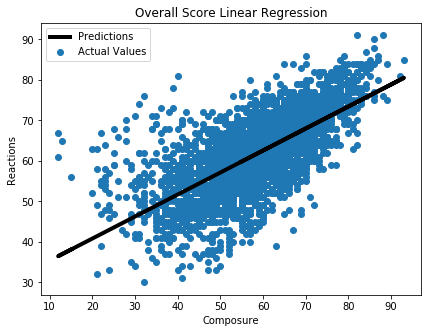

In [8]:
plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.scatter(x_te_C, y_te_C)
plt.plot(x_te_C, overall_predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Overall Score Linear Regression')
plt.xlabel('Composure')
plt.ylabel('Reactions')


Let's create a linear regression model with composure vs overall to enumerate how well a player's composure score can predict his overall rating.

MSE:  98.98557865913966
training score:  0.5307595036017325
validation score:  0.520754595347374


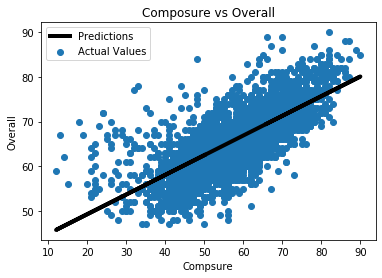

In [9]:
age_model = LinearRegression()
X_A = fifa[["Composure"]]
Y_A = fifa["Overall"]
x_tr_A, x_te_A, y_tr_A, y_te_A = train_test_split(X_A, Y_A, test_size = 0.2)
age_model.fit(x_tr_A, y_tr_A)

from sklearn.metrics import mean_squared_error
age_predictions = age_model.predict(x_te_A)
age_MSE = mean_squared_error(x_te_A, age_predictions)
print('MSE: ', age_MSE)

plt.scatter(x_te_A, y_te_A)
plt.plot(x_te_A, age_predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Composure vs Overall')
plt.xlabel('Compsure')
plt.ylabel('Overall')

print('training score: ',age_model.score(x_tr_A, y_tr_A))
print('validation score: ', age_model.score(x_te_A, y_te_A))

Now, let's create a linear regression model with reactions vs overall to enumerate how well a player's reactions score can predict his overall rating.

MSE:  59.82460108344494
training score:  0.6017600318466985
validation score:  0.6029001866611847


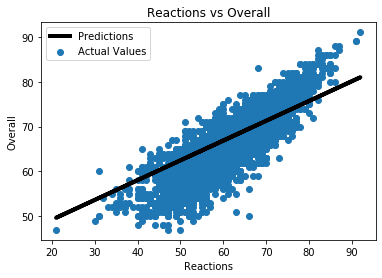

In [10]:
age_model2 = LinearRegression()
X_A2 = fifa[["Reactions"]]
Y_A2 = fifa["Overall"]
x_tr_A2, x_te_A2, y_tr_A2, y_te_A2 = train_test_split(X_A2, Y_A2, test_size = 0.2)
age_model2.fit(x_tr_A, y_tr_A)

from sklearn.metrics import mean_squared_error
age_predictions2 = age_model2.predict(x_te_A2)
age_MSE2 = mean_squared_error(x_te_A2, age_predictions2)
print('MSE: ',age_MSE2)

plt.scatter(x_te_A2, y_te_A2)
plt.plot(x_te_A2, age_predictions2, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Reactions vs Overall')
plt.xlabel('Reactions')
plt.ylabel('Overall')

print('training score: ',age_model.score(x_tr_A2, y_tr_A2))
print('validation score: ',age_model.score(x_te_A2, y_te_A2))

Another visualization is a box plot, which we can use to visually assess how they compare to each other as distributions:

In [11]:
fifa0 = fifa[['Composure','Reactions']]

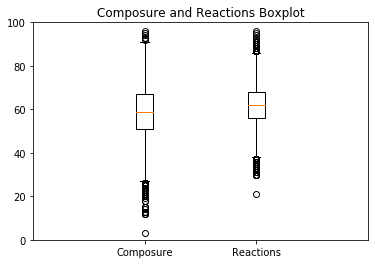

In [12]:
bp = plt.boxplot([fifa0['Composure'],fifa0['Reactions']])

plt.title('Composure and Reactions Boxplot')
plt.xticks([1,2],['Composure','Reactions'])
plt.xlim([0,3])
plt.ylim([0,100])

plt.show()

Now, let's clean the data so that there is a value of 1 in the Overall column if the score is greater than average and a value of 0 if the score is lower than average.

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fifa2 = fifa[['Dribbling','LongShots','Finishing','Reactions','Vision','Composure','Penalties', 'Overall']]


In [14]:
fifa2['Overall'].loc[(fifa2.Overall < fifa['Overall'].mean())]= 0

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
fifa2['Overall'].loc[(fifa2.Overall >= fifa['Overall'].mean())]=1
fifa2

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Dribbling,LongShots,Finishing,Reactions,Vision,Composure,Penalties,Overall
0,97.0,94.0,95.0,95.0,94.0,96.0,75.0,1
1,88.0,93.0,94.0,96.0,82.0,95.0,85.0,1
2,96.0,82.0,87.0,94.0,87.0,94.0,81.0,1
3,18.0,12.0,13.0,90.0,68.0,68.0,40.0,1
4,86.0,91.0,82.0,91.0,94.0,88.0,79.0,1
...,...,...,...,...,...,...,...,...
18202,42.0,38.0,38.0,49.0,52.0,45.0,43.0,0
18203,39.0,42.0,52.0,40.0,33.0,42.0,43.0,0
18204,45.0,45.0,40.0,47.0,43.0,41.0,55.0,0
18205,51.0,34.0,50.0,21.0,47.0,46.0,50.0,0


Let's conduct classification models on newly cleaned data with the target as "Overall" (whether or not the overall score will be higher or lower than average)

In [16]:
X=fifa2.drop('Overall',axis=1)
y=fifa2['Overall']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = KNeighborsClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for overall:", accuracy_score(y_test, predictions))

sklearn's accuracy score for overall: 0.8527021089630932


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy=[]
for k in range(1,51):
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(predictions,y_test))

Graphing the relationship between the value of k and the accuracy score:

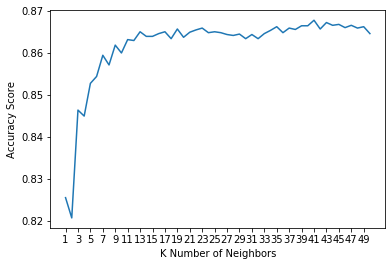

In [19]:
plt.plot(range(1,51),accuracy)
plt.xticks(range(1,51,2),range(1,51,2))
plt.xlabel("K Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.show()

There is a sharp increase in accuracy score as k increases

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

Train Accuracy:  0.9036581346808744
Test Accuracy:  0.8527021089630932


Measuring accuracy with another model: Decision Tree Classifier:

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model=tree.DecisionTreeClassifier(max_depth=5)

model.fit(x_train,y_train)

dtree_pred_train = model.predict(x_train)
dtree_pred_test = model.predict(x_test) 
print("Train Accuracy: ", accuracy_score(y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, dtree_pred_test))

Train Accuracy:  0.8683950346039767
Test Accuracy:  0.8494068541300527


When comparing the accuracy scores of the decision tree classifier and the KNN classifier, the train and test accuracy are lower. With the decision tree, the machine is actually mildly overfitting as the train accuracy is slightly greater than the test accuracy.

Write up:

For the visualization portion, we found the mean of the needed columns and replaced the empty cells with those values. This allowed us to clean our data. We decided that the correlation matrix was the best representation as for our hypothesis we wanted to test the relationship between certain attributes and the overall score. After seeing the correlation matrix, we saw that Composure and Reactions had the highest correlation scores with Overall. Therefore, we used those two columns to perform a linear regression. We also performed another linear regression with Composure and Overall to further investigate the relationship between the two.

For the machine learning portion, we wanted to further investigate the relationship between attributes and how they could help predict overall score. To be able to use a classifier, we cleaned up our data through the creation of fifa2. This new data frame was the same as fifa1 except we replaced overall score with the binary value of 1 or 0 depending on whether the score was above or below average, respectively. After using the KNN classifier, we graphed the relationship between the K Number of Neighbors and accuracy score, showing a sharp increase as the k increases. This can be interpreted that a high value of k can improve the accuracy of the data. In order to further investigate accuracy scores, we also conducted a decision tree classifier, but the accuracy scores were less than those of the KNN classifier.

To revisit the hypothesis, we must amend our initial ideas. The technical skills such as shooting, passing, and dribbling surprisingly did not have as much of an effect on a player's overall score compared to attributes like Composure and Reactions. This yields new insights into how a player's ability to remain level-headed under pressure and physical reaction skills are important factors in their overall value.